# **Building and Deploying a Machine Learning Model with Scikit-Learn and ONNX**

In [1]:
#pip install pandas scikit-learn onnx skl2onnx onnxruntime chardet


Import Required Libraries

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as rt
import chardet
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, SelectKBest

 Load the Dataset

In [3]:
# Read the CSV file with the detected encoding
data = pd.read_csv("data_public.csv")
# Show the first few rows of the data
print(data.head())

            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1  -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2  -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3  221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4  228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   

            G           H          I           J           K         L  \
0  131.591871  198.160805  82.873279  127.350084  224.592926 -5.992983   
1   -0.094457  -33.711852  -8.356041   23.792402    4.199023  2.809159   
2   -2.953836  -25.299219  -6.612401   26.285392    5.911292  6.191587   
3  108.857593  197.640135  82.560019  157.105143  212.989231 -3.621070   
4  115.598954  209.300011  89.961688  130.299732  201.795100 -1.573922   

           M           N           O  Class  
0 -14.689648  143.072058  153.439659      3  
1 -59.330681  -11.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB
None

Summary Statistics:
                  A             B             C             D             E  \
count  1.2000

<ipython-input-4-0643153ffb8c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='pastel')


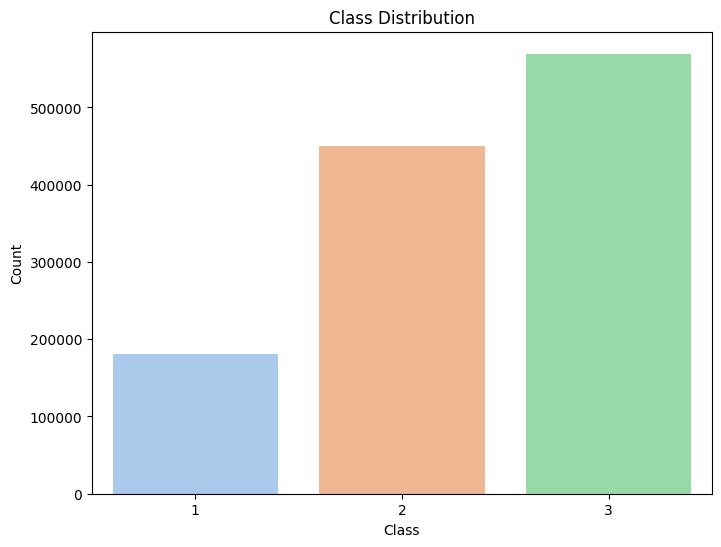

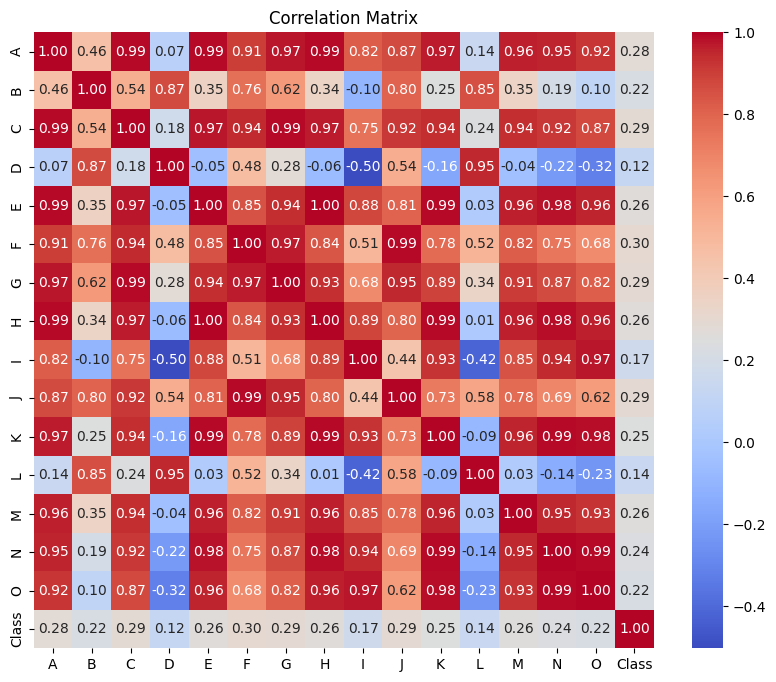

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Visualize the distribution of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='pastel')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()




Define Features and Target Variable

In [5]:
# Define features and target (adjusting to use 'Class' as the target column)
X = data.drop(columns=["Class"])  # Features (all columns except 'Class')
y = data["Class"]  # Target (classification target column 'Class')


Handle missing values in the target variable using SimpleImputer

In [6]:
# Use the most frequent class for imputing missing values in the target variable
target_imputer = SimpleImputer(strategy='most_frequent')
y_imputed = target_imputer.fit_transform(y.values.reshape(-1, 1)).flatten()


 Split the Dataset into Training and Testing Sets

In [7]:
# Use  imputed target variable (y_imputed) in the training process
X_train, X_test, y_train, y_test = train_test_split(X, y_imputed, test_size=0.2, random_state=42)


Define a Preprocessing and Modeling Pipeline with SMOTE

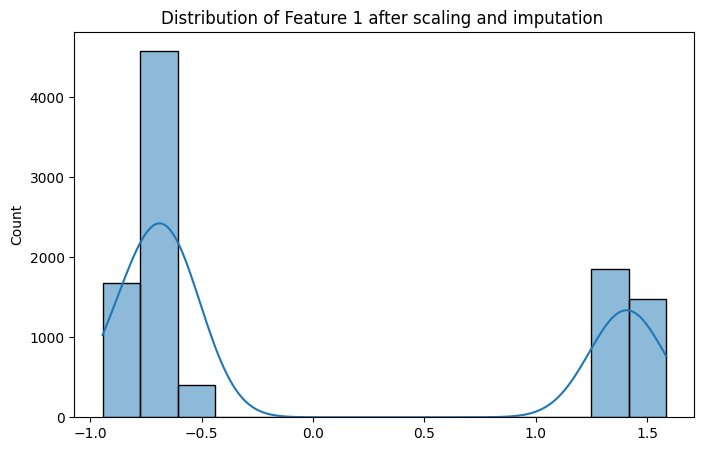

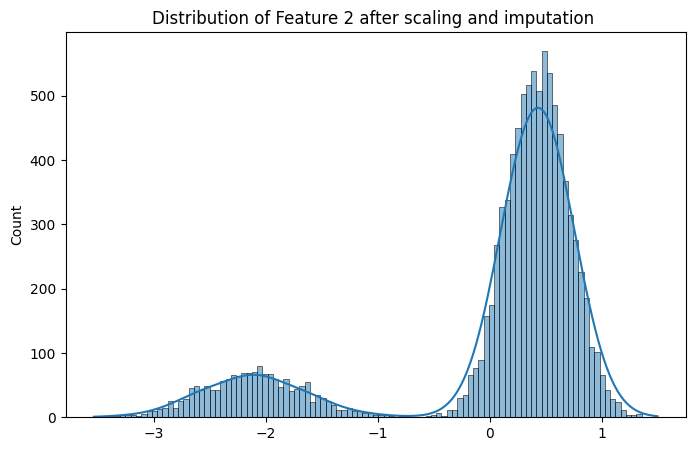

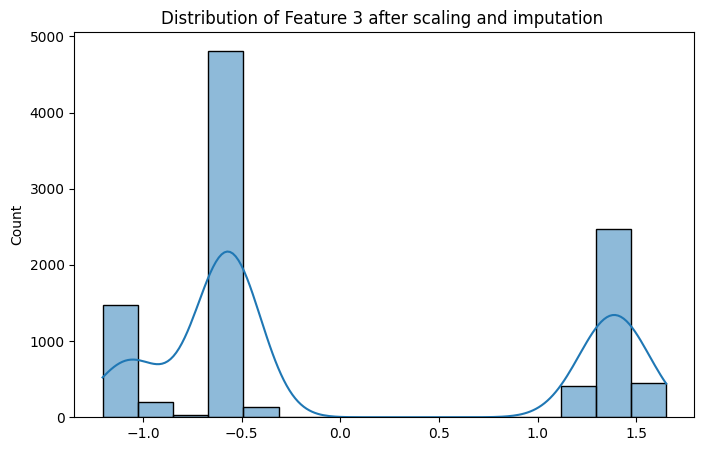

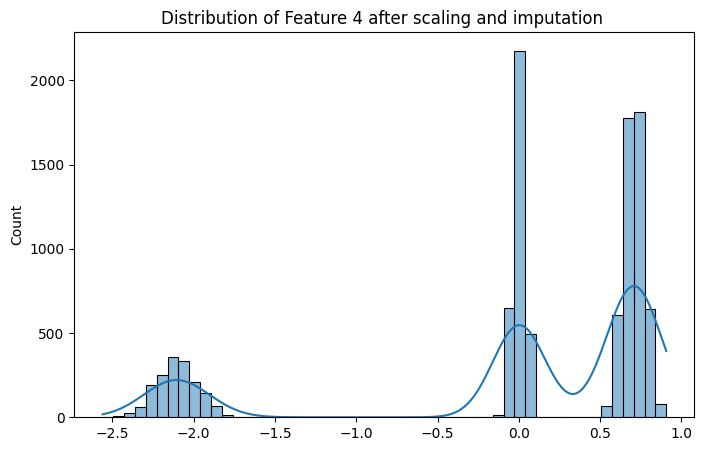

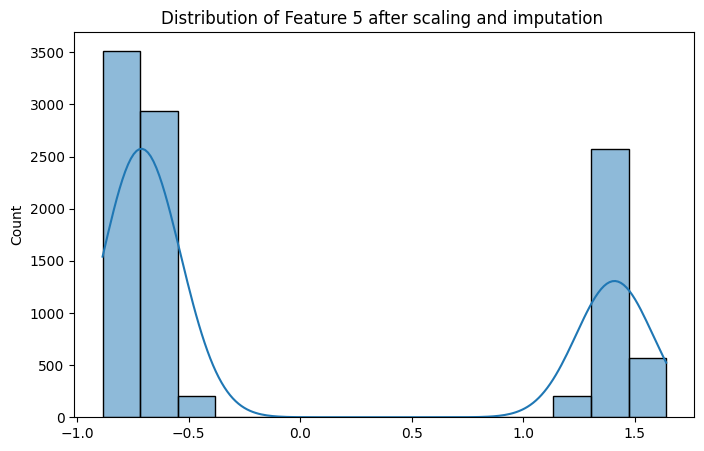

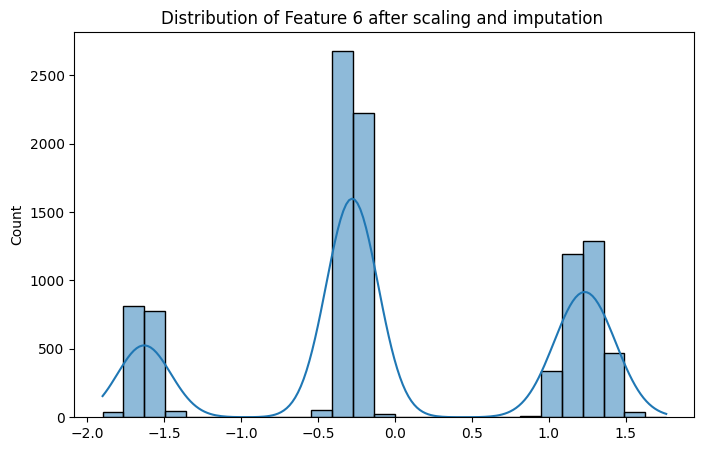

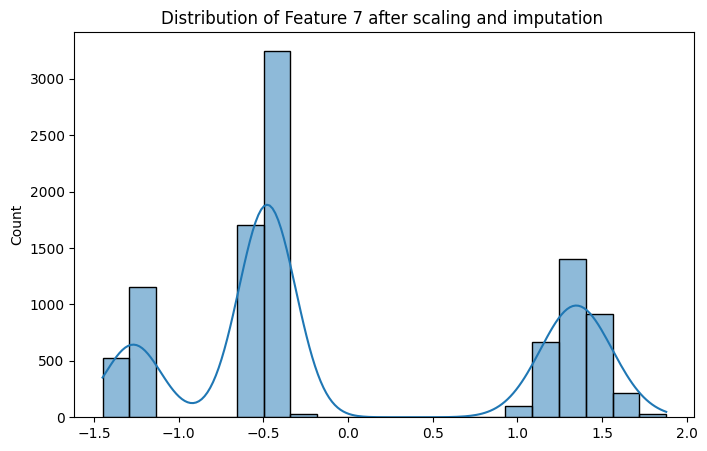

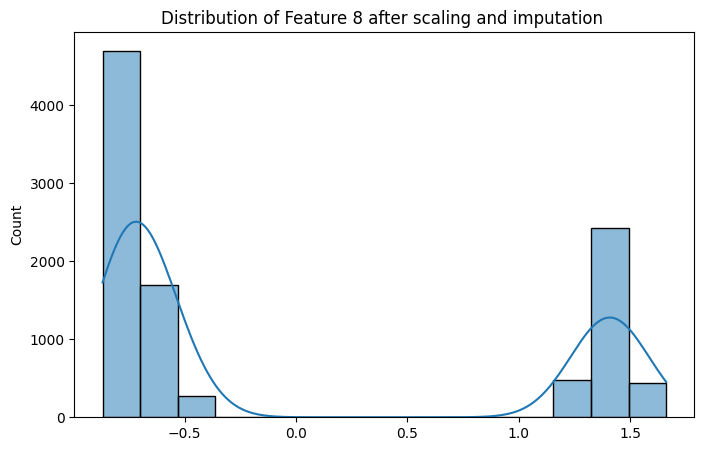

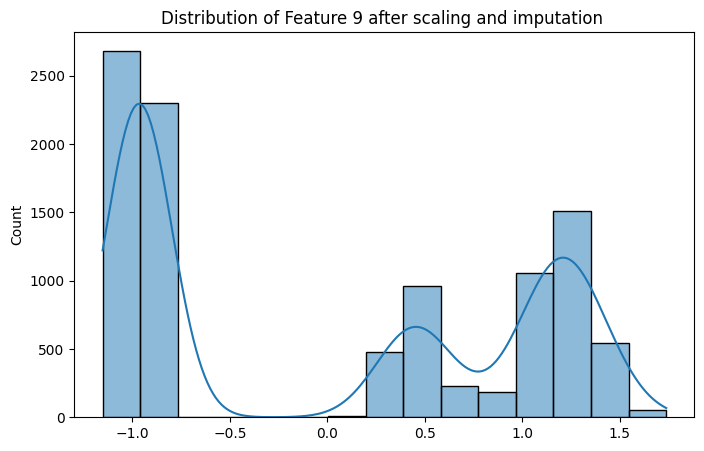

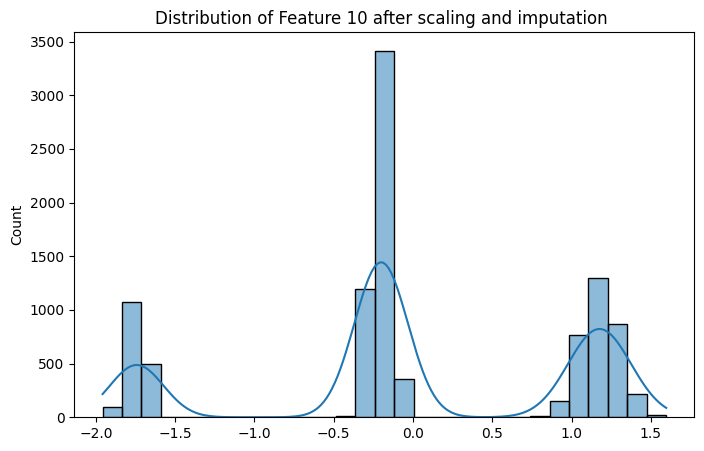

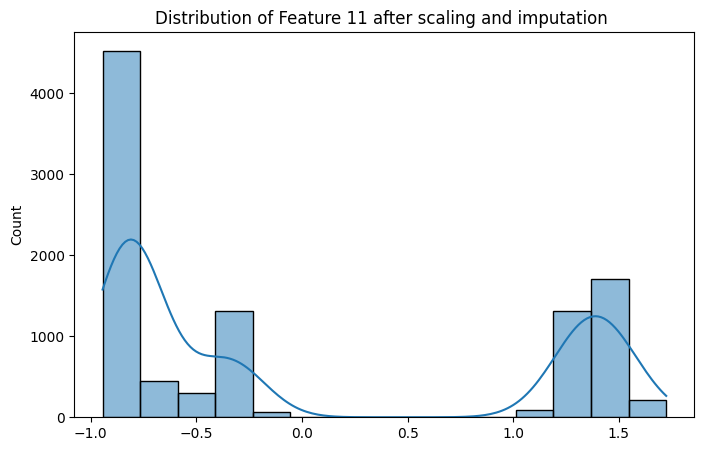

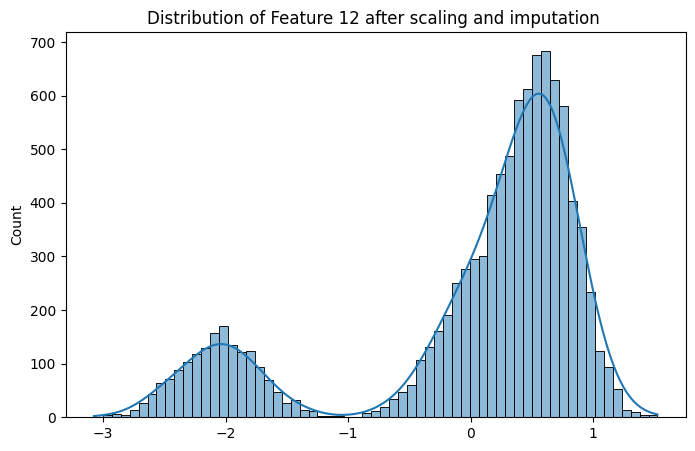

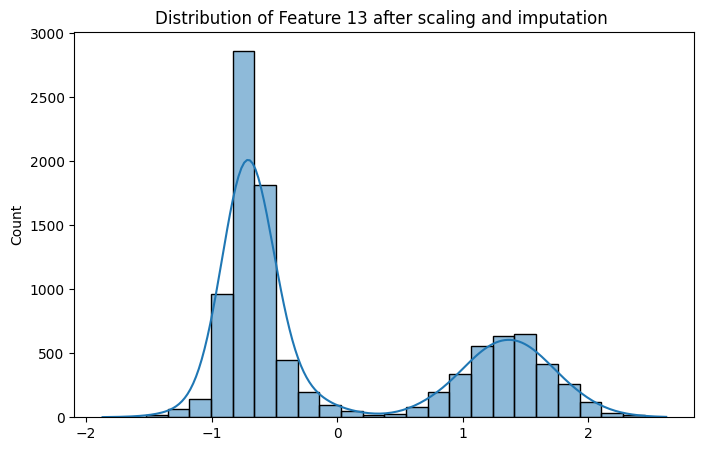

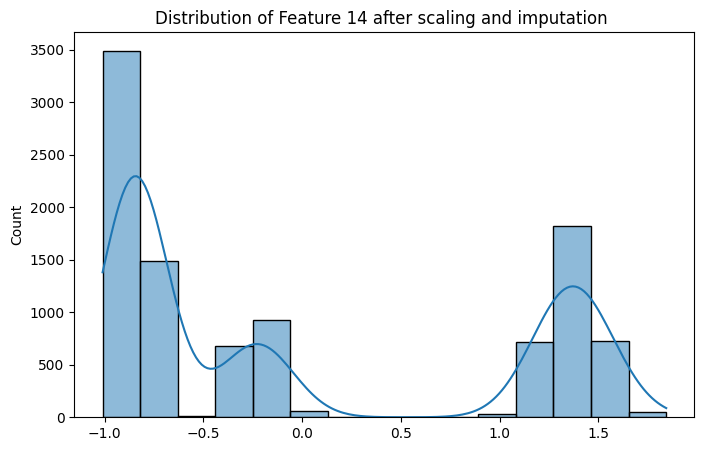

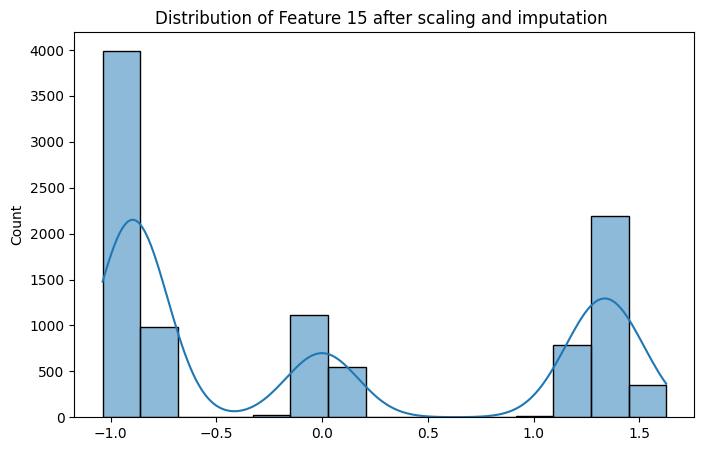

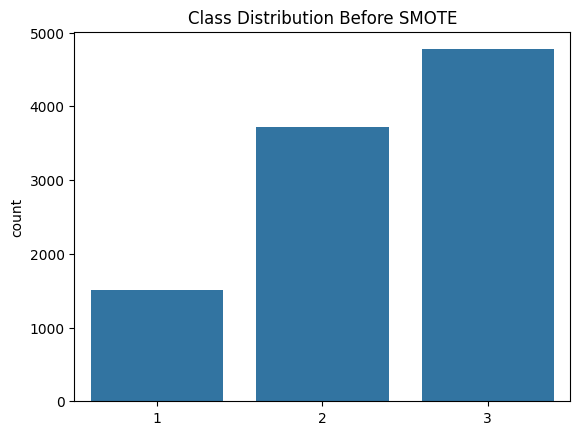

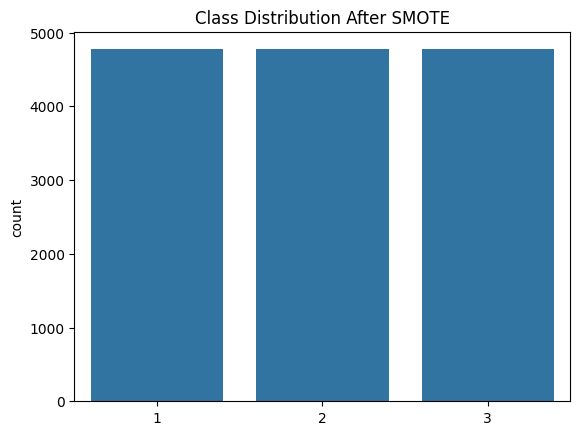

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Redefine the pipeline
pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale features
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to balance the dataset
    ('model', GaussianNB())  # Train Gaussian Naive Bayes
])

X_train_limited = X_train[:10000]
y_train_limited = y_train[:10000]

# Fit the pipeline on the limited data
pipeline.fit(X_train_limited, y_train_limited)

# Now the pipeline is fitted, and transformations like SMOTE and scaling are applied

# Use the pipeline to make predictions or to evaluate the model on the test set
y_pred = pipeline.predict(X_test)  # Example: making predictions on the test set

# Visualizing distributions of features after transformation (for the limited data)
X_train_transformed = pipeline.named_steps['scaler'].transform(pipeline.named_steps['imputer'].transform(X_train_limited))

# Visualizing the transformed features
for column in range(X_train_limited.shape[1]):
    plt.figure(figsize=(8, 5))
    sns.histplot(X_train_transformed[:, column], kde=True)
    plt.title(f'Distribution of Feature {column+1} after scaling and imputation ')
    plt.show()

#  visualize the class distribution after SMOTE
sns.countplot(x=y_train_limited)
plt.title('Class Distribution Before SMOTE')
plt.show()

# Now, after applying SMOTE in the pipeline, visualize the balanced class distribution
sns.countplot(x=pipeline.named_steps['smote'].fit_resample(X_train_limited, y_train_limited)[1])
plt.title('Class Distribution After SMOTE')
plt.show()


# 1. Univariate Analysis
Univariate analysis focuses on the distribution of a single variable. Common techniques include calculating summary statistics and visualizing the distribution.

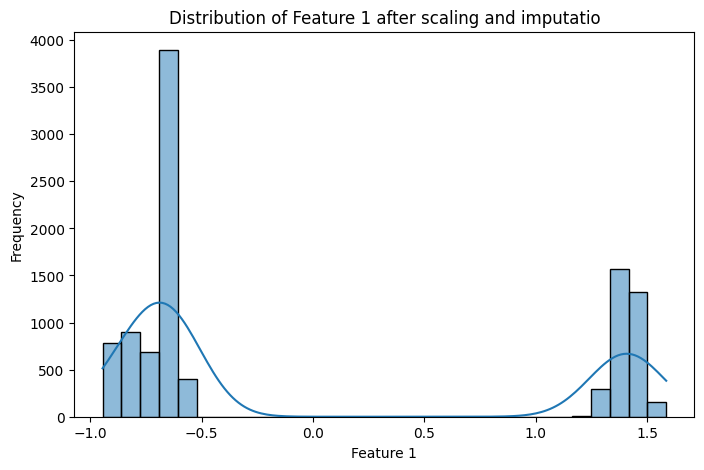

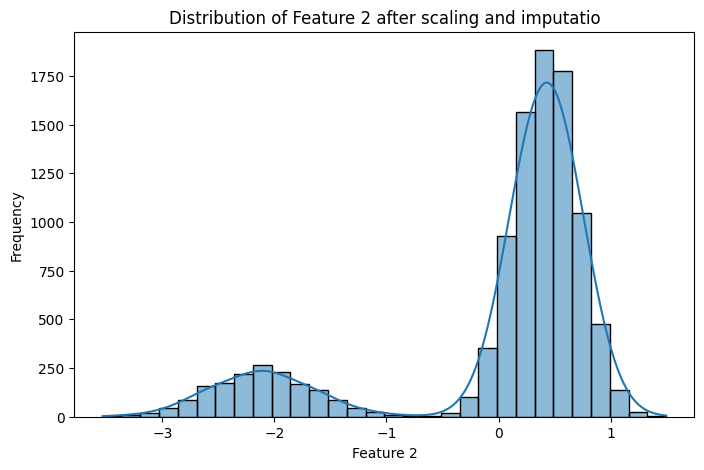

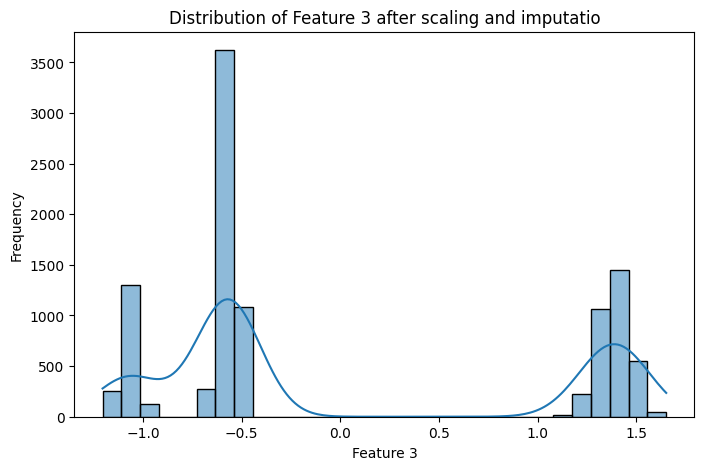

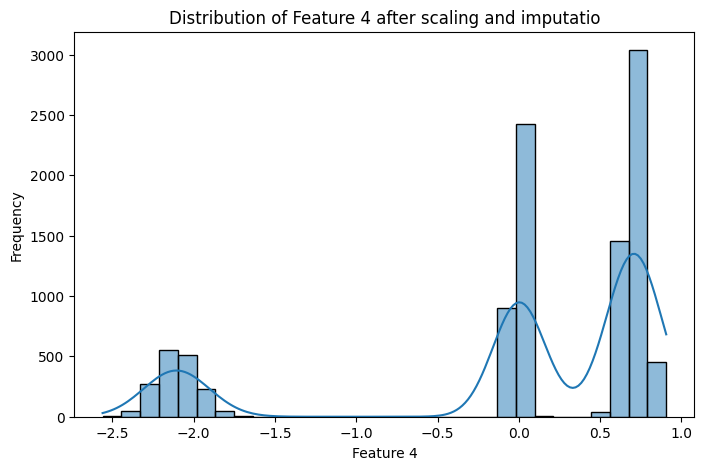

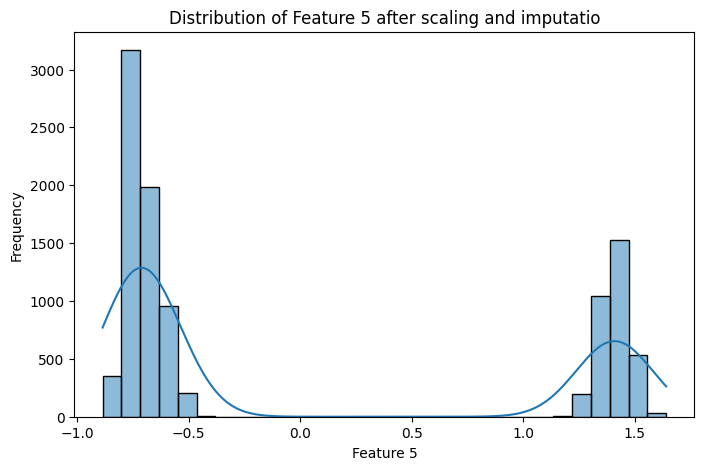

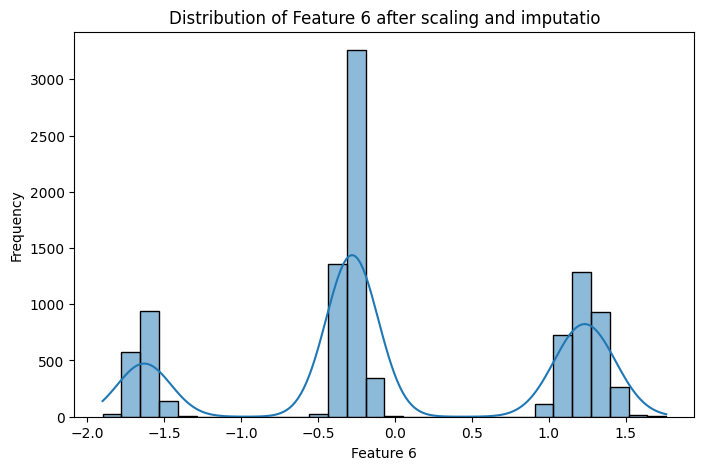

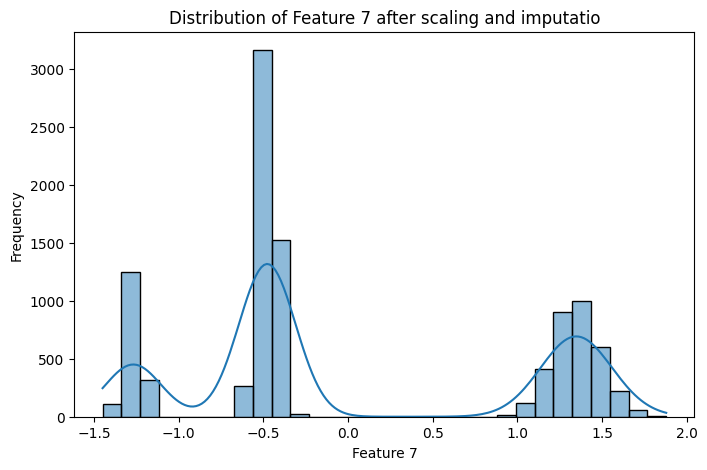

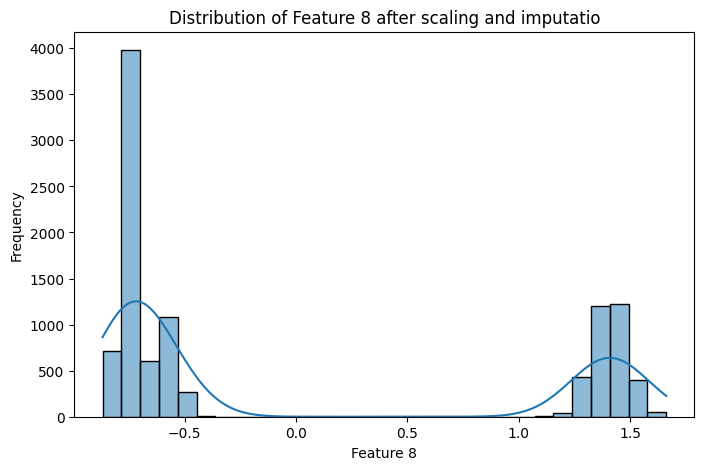

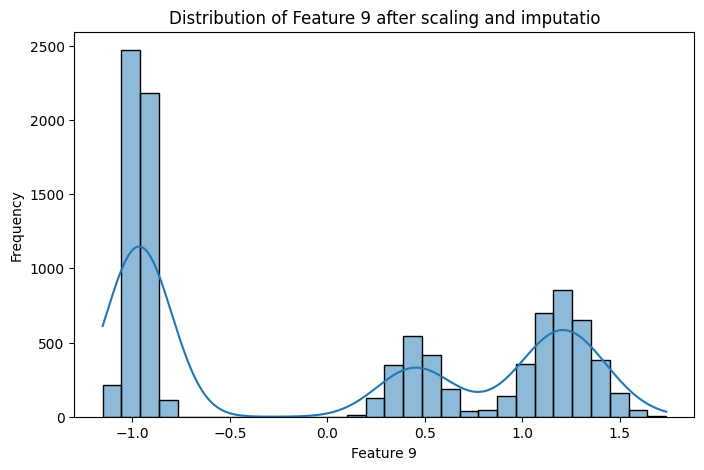

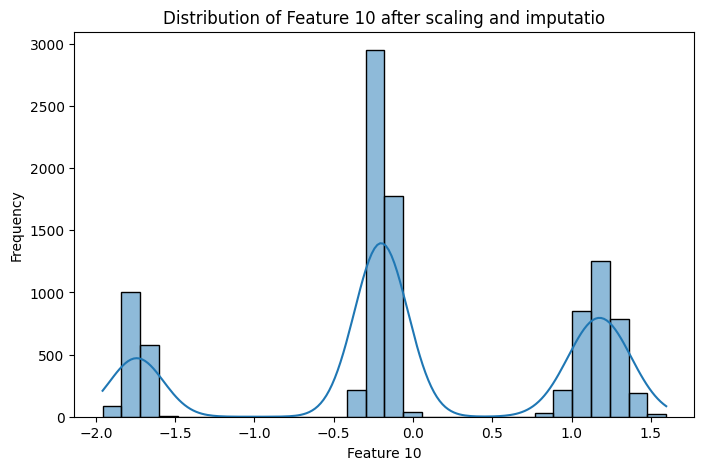

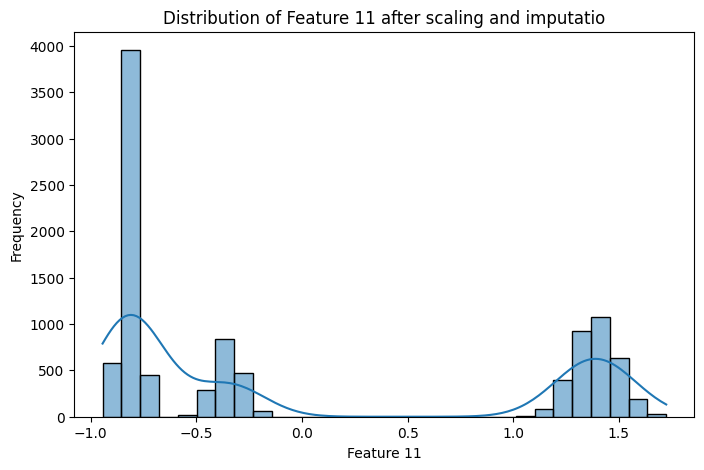

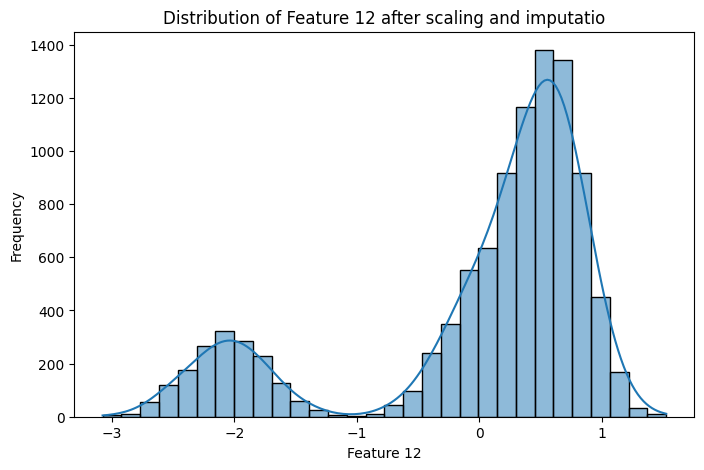

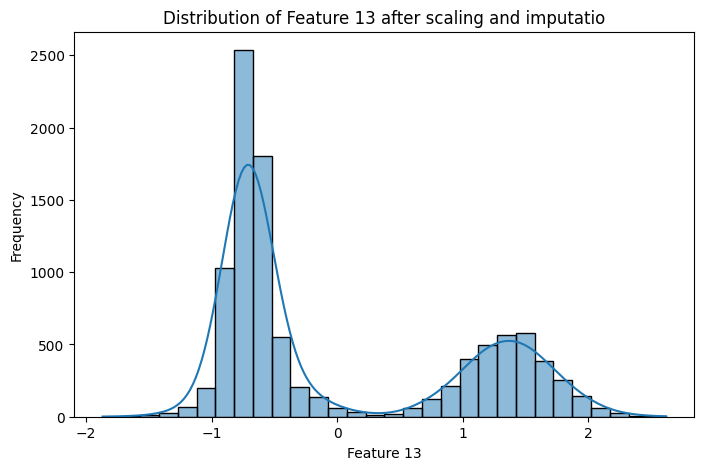

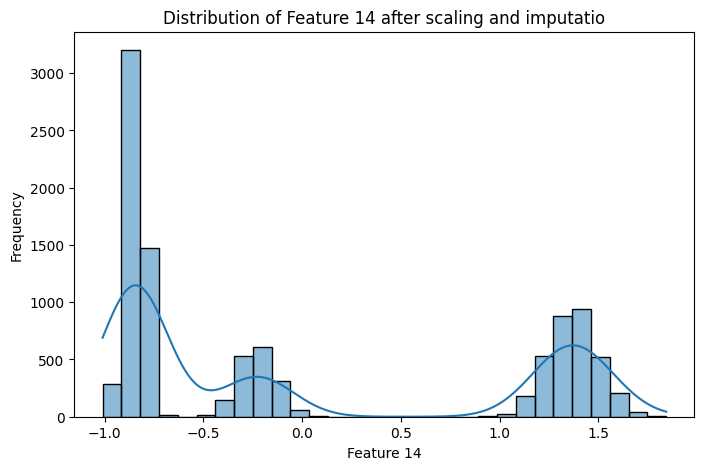

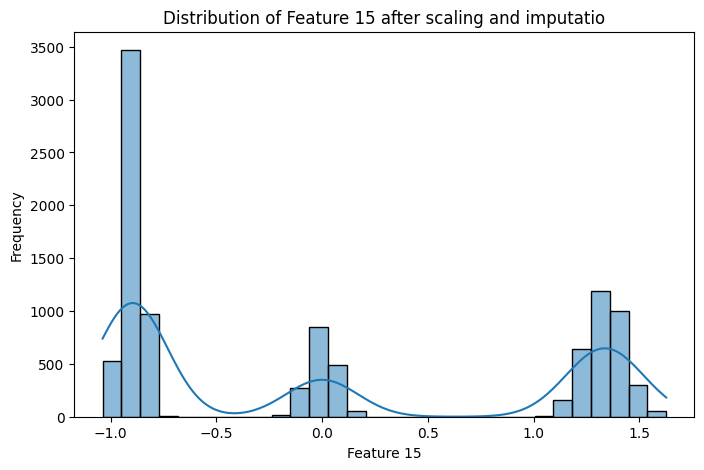

In [9]:
# Univariate analysis for each feature (Numerical data)
for column in range(X_train_limited.shape[1]):
    plt.figure(figsize=(8, 5))

    # Plot the distribution of the feature
    sns.histplot(X_train_transformed[:, column], kde=True, bins=30)
    plt.title(f'Distribution of Feature {column+1} after scaling and imputatio')
    plt.xlabel(f'Feature {column+1}')
    plt.ylabel('Frequency')
    plt.show()


# b. Calculate Summary Statistics

In [10]:
import pandas as pd

# Convert the numpy array back to a DataFrame for easier summary statistics
X_train_df = pd.DataFrame(X_train_transformed, columns=[f'Feature {i+1}' for i in range(X_train_limited.shape[1])])

# Calculate summary statistics
summary_stats = X_train_df.describe()

# Display the summary statistics
print("Summary Statistics for Features:")
print(summary_stats)


Summary Statistics for Features:
          Feature 1     Feature 2     Feature 3     Feature 4     Feature 5  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean  -3.339551e-17  6.643575e-17 -4.263256e-17 -5.115908e-17  7.105427e-18   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -9.442152e-01 -3.532838e+00 -1.205079e+00 -2.560985e+00 -8.856133e-01   
25%   -6.877517e-01  6.496223e-02 -6.074259e-01 -2.042111e-02 -7.382671e-01   
50%   -6.390424e-01  3.540040e-01 -5.527994e-01  8.765946e-02 -6.663518e-01   
75%    1.370675e+00  5.744069e-01  1.333314e+00  7.079695e-01  1.365558e+00   
max    1.585219e+00  1.495878e+00  1.652071e+00  9.071350e-01  1.641494e+00   

          Feature 6     Feature 7     Feature 8     Feature 9    Feature 10  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean  -1.278977e-17  1.421085e-17  2.557954e-17 -1.769251e-16  6.394885e-17   
std    1.000050e+0

# 2. Bivariate Analysis
Bivariate analysis looks at the relationship between two variables. visualize the correlation between features and the target variable or between pairs of features.

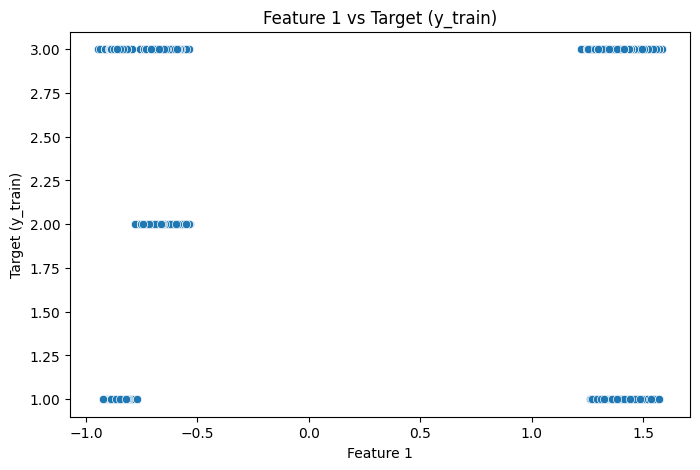

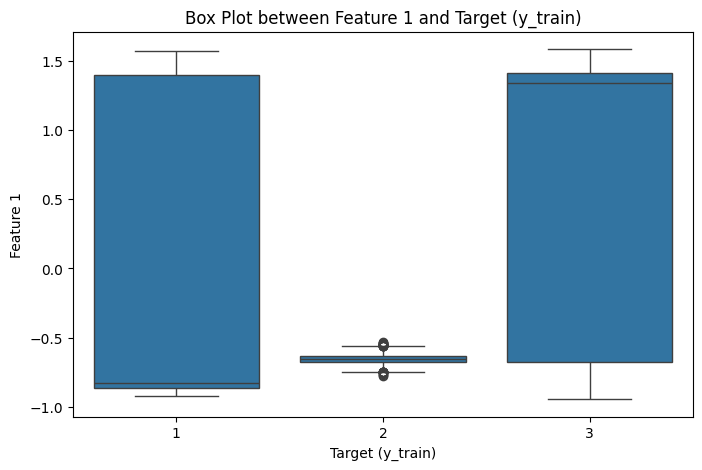

In [11]:
# Scatter plot between Feature 1 and the target variable (y_train)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train_transformed[:, 0], y=y_train_limited)
plt.title('Feature 1 vs Target (y_train)')
plt.xlabel('Feature 1')
plt.ylabel('Target (y_train)')
plt.show()

#  box plot for feature vs target (for classification tasks)
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_train_limited, y=X_train_transformed[:, 0])
plt.title('Box Plot between Feature 1 and Target (y_train)')
plt.xlabel('Target (y_train)')
plt.ylabel('Feature 1')
plt.show()


# 3. Multivariate Analysis
Multivariate analysis looks at the relationships between multiple features simultaneously.

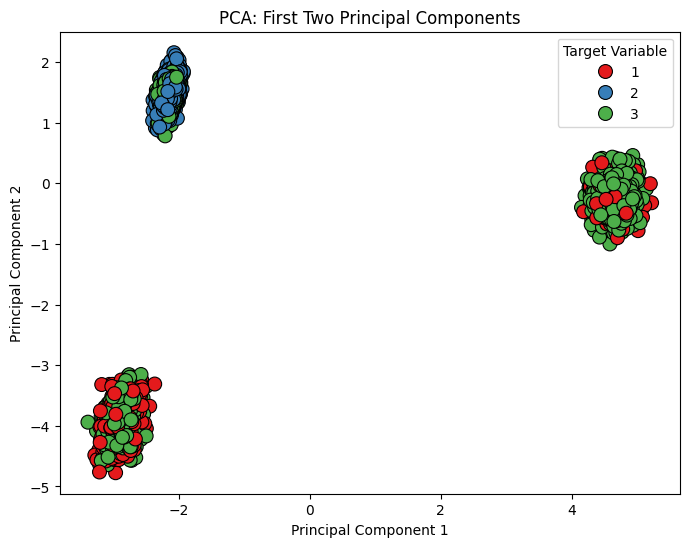

Explained Variance by Component 1: 0.73
Explained Variance by Component 2: 0.25


In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2 components (for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_transformed)

# Visualize the data in the 2D space of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_limited, palette="Set1", s=100, edgecolor='k')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target Variable')
plt.show()

# Explained variance by each principal component
print(f"Explained Variance by Component 1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained Variance by Component 2: {pca.explained_variance_ratio_[1]:.2f}")


# Multivariate Regression (If applicable)

In [13]:
from sklearn.linear_model import LinearRegression

# Fit a multivariate linear regression model
model = LinearRegression()
model.fit(X_train_transformed, y_train_limited)

# Coefficients of the model
print("Regression Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f'Feature {i+1}: {coef:.2f}')


Regression Coefficients:
Feature 1: -0.06
Feature 2: -0.05
Feature 3: -0.07
Feature 4: -0.02
Feature 5: -0.01
Feature 6: 0.00
Feature 7: 0.09
Feature 8: 0.18
Feature 9: 0.09
Feature 10: 0.21
Feature 11: -0.06
Feature 12: 0.04
Feature 13: 0.02
Feature 14: -0.07
Feature 15: -0.07


# 4. Test Statistics for Feature Relationships
visualized the data,  perform statistical tests to understand the relationships between variables:




In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Combine the feature and target data into a DataFrame
df = pd.DataFrame({'Feature 1': X_train_transformed[:, 0], 'Target': y_train_limited})

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(df['Feature 1'], df['Target'], alpha=0.05)
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.7898   0.0 -0.8511 -0.7285   True
     1      3   0.3308   0.0  0.2714  0.3901   True
     2      3   1.1206   0.0  1.0767  1.1645   True
---------------------------------------------------


### Model Hyperparameter Tuning for Multiple Classifiers

In this section, w perform hyperparameter tuning for six different classifiers using a small subset of the training data. The classifiers include:

1. **Gaussian Naive Bayes (GaussianNB)**
2. **Logistic Regression**
3. **K-Nearest Neighbors (KNN)**
4. **Decision Tree Classifier**
5. **Random Forest Classifier**
6. **Support Vector Classifier (SVC)**

 perform the following steps:
- Split the dataset into a smaller subset for faster tuning.
- Define a small range of hyperparameter values for each model.
- Train each model using the defined hyperparameters.
- Evaluate the model performance using the **F1 Score** (weighted average).
- Output the best-performing model and its corresponding hyperparameters.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Reduce training dataset size to 1-2% for quicker tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.98, random_state=42)

# Define a hyperparameter grid for each model
param_grids = {
    'GaussianNB': {'var_smoothing': [1e-9]},
    'LogisticRegression': {'C': [1]},
    'KNeighborsClassifier': {'n_neighbors': [5]},
    'DecisionTreeClassifier': {'max_depth': [5]},
    'SVC': {'C': [1]},  # Linear SVM
    'RandomForestClassifier': {'n_estimators': [10]}
}

# Dictionary to store results
results = {}

# Tuning function to handle different models
def tune_model(model, param_grid):
    pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Split small dataset into train/validation for quick evaluation
    X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(X_train_small, y_train_small, test_size=0.2, random_state=42)

    # Hyperparameter tuning
    best_score = 0
    best_params = None
    for param, values in param_grid.items():
        for value in values:
            # Set model hyperparameters
            model.set_params(**{param: value})

            # Train the pipeline and evaluate
            pipeline.fit(X_train_tune, y_train_tune)
            y_pred = pipeline.predict(X_val_tune)
            score = f1_score(y_val_tune, y_pred, average='weighted')

            if score > best_score:
                best_score = score
                best_params = {param: value}

    return best_params, best_score

# Loop through models and evaluate
for model_name, param_grid in param_grids.items():
    print(f"Starting tuning for {model_name}...")
    if model_name == 'GaussianNB':
        model = GaussianNB()
    elif model_name == 'LogisticRegression':
        model = LogisticRegression(solver='liblinear')
    elif model_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier()
    elif model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == 'SVC':
        model = SVC(kernel='linear')
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=42)

    best_params, best_score = tune_model(model, param_grid)
    results[model_name] = (best_params, best_score)
    print(f"Finished tuning for {model_name} with Best Params: {best_params} and F1 Score={best_score:.4f}\n")

# Find the best model
best_model_name = max(results, key=lambda x: results[x][1])
best_params, best_score = results[best_model_name]

print(f"\nBest model: {best_model_name} with Best Params: {best_params} and F1 Score={best_score:.4f}")

# Now create the pipeline with the best model
if best_model_name == 'GaussianNB':
    best_model = GaussianNB(**best_params)
elif best_model_name == 'LogisticRegression':
    best_model = LogisticRegression(solver='liblinear', **best_params)
elif best_model_name == 'KNeighborsClassifier':
    best_model = KNeighborsClassifier(**best_params)
elif best_model_name == 'DecisionTreeClassifier':
    best_model = DecisionTreeClassifier(random_state=42, **best_params)
elif best_model_name == 'SVC':
    best_model = SVC(kernel='linear', **best_params)
elif best_model_name == 'RandomForestClassifier':
    best_model = RandomForestClassifier(random_state=42, **best_params)
# Find the best model
best_model = max(results, key=lambda x: results[x][1])
print(f"\nBest model: {best_model} with Best Params: {results[best_model][0]} and F1 Score={results[best_model][1]:.4f}")


Starting tuning for GaussianNB...
Finished tuning for GaussianNB with Best Params: {'var_smoothing': 1e-09} and F1 Score=0.7132

Starting tuning for LogisticRegression...
Finished tuning for LogisticRegression with Best Params: {'C': 1} and F1 Score=0.7058

Starting tuning for KNeighborsClassifier...
Finished tuning for KNeighborsClassifier with Best Params: {'n_neighbors': 5} and F1 Score=0.6656

Starting tuning for DecisionTreeClassifier...
Finished tuning for DecisionTreeClassifier with Best Params: {'max_depth': 5} and F1 Score=0.7145

Starting tuning for SVC...
Finished tuning for SVC with Best Params: {'C': 1} and F1 Score=0.7132

Starting tuning for RandomForestClassifier...
Finished tuning for RandomForestClassifier with Best Params: {'n_estimators': 10} and F1 Score=0.6904


Best model: DecisionTreeClassifier with Best Params: {'max_depth': 5} and F1 Score=0.7145

Best model: DecisionTreeClassifier with Best Params: {'max_depth': 5} and F1 Score=0.7145


Use the best hyperparameter to define the best model

In [16]:
# 'best_model' was selected correctly as a model object (not a string)
best_model = DecisionTreeClassifier(max_depth=5)  # Best model after tuning (no n_jobs for DecisionTree)

# Define the pipeline with the best model
best_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values for features
    ('scaler', StandardScaler()),  # Scale features (optional for DecisionTree, but included here)
    ('smote', SMOTE(random_state=42)),  # Handle class imbalance
    ('model', best_model)  # Best model from the tuning process
])

# Use a testing set for faster fitting
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Fit the pipeline with the smaller subset
best_pipeline.fit(X_train_small, y_train_small)

# Use best_pipeline to make predictions or evaluate on the test set
y_pred = best_pipeline.predict(X_test)


In [17]:
best_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('model', DecisionTreeClassifier(max_depth=5))])

Train the Best Pipeline

In [18]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  # Optional for feature reduction
import numpy as np

# Sample the dataset for faster training (use a fraction of the data for final training)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

# Create the final pipeline with SMOTE, DecisionTreeClassifier, and other steps
best_model = DecisionTreeClassifier(max_depth=5)  # Best model after tuning (max_depth=5 for faster fitting)

# Optionally reduce dimensionality to speed up training
pca = PCA(n_components=0.95)  # Retain 95% of variance for dimensionality reduction (adjust as needed)

final_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing
    ('scaler', StandardScaler()),  # Standardize the features
    ('pca', pca),  # Reduce dimensionality with PCA (optional)
    ('smote', SMOTE(random_state=42, n_jobs=-1)),  # Handle class imbalance with SMOTE
    ('model', best_model)  # Decision Tree model
])

# Fit the pipeline with the sampled dataset
final_pipeline.fit(X_train_sample, y_train_sample)

# Use the final pipeline to make predictions or evaluate on test set
y_pred = final_pipeline.predict(X_test)
final_pipeline

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('smote', SMOTE(n_jobs=-1, random_state=42)),
                ('model', DecisionTreeClassifier(max_depth=5))])

Perform Cross-Validation

In [19]:
# Perform 5-fold cross-validation
#cv_scores = cross_val_score(best_pipeline, X, y_imputed, cv=5)
#print("Cross-validation scores:", cv_scores)
#print("Average CV score:", cv_scores.mean())


 Predict and Evaluate the Model


Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.55      0.52     36189
           2       0.75      1.00      0.86     89845
           3       0.80      0.56      0.66    113966

    accuracy                           0.72    240000
   macro avg       0.68      0.70      0.68    240000
weighted avg       0.73      0.72      0.71    240000

F1-score: 0.7126382819122589
ROC AUC: 0.8351874782850519


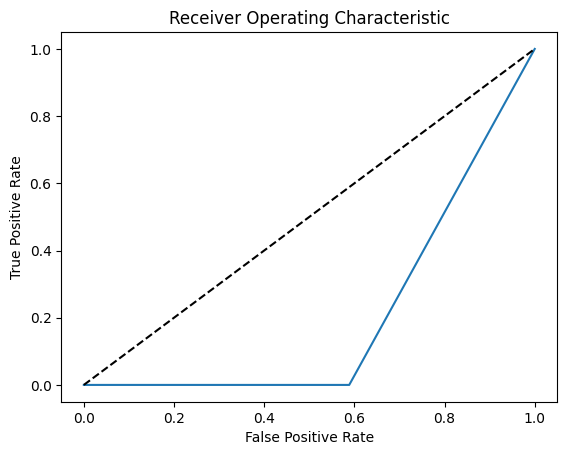

In [20]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict using the trained pipeline
predictions = best_pipeline.predict(X_test)

# Evaluate using classification report
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Calculate and print F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1-score:", f1)

# Calculate ROC AUC score for multi-class (One-vs-Rest strategy)
roc_auc = roc_auc_score(y_test, best_pipeline.predict_proba(X_test), multi_class='ovr')
print("ROC AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_pipeline.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


Convert the Trained Model to ONNX Format

In [21]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Sample the dataset for faster training (use a fraction of the data for final training)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

# Define the preprocessing steps (Imputation, Scaling, PCA)
preprocessing_steps = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Optional: Reduce dimensions with PCA
]

# Fit the preprocessing steps on a subset of the training data
X_train_sample_preprocessed = X_train_sample.copy()  # will apply these transformations

for step_name, step in preprocessing_steps:
    # Fit each step on the sample data
    step.fit(X_train_sample_preprocessed)
    X_train_sample_preprocessed = step.transform(X_train_sample_preprocessed)  # Transform data

# Now convert the fitted preprocessing steps to ONNX format
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

onnx_preprocessors = []
for step_name, step in preprocessing_steps:
    # Convert each fitted step to ONNX
    onnx_step = convert_sklearn(step, initial_types=initial_type)
    onnx_preprocessors.append((step_name, onnx_step))

# Save each preprocessing step to an ONNX file
for i, (step_name, onnx_step) in enumerate(onnx_preprocessors):
    with open(f"{step_name}_step.onnx", "wb") as f:
        f.write(onnx_step.SerializeToString())

# Now, convert the model (DecisionTreeClassifier)
best_model = DecisionTreeClassifier(max_depth=5)
best_model.fit(X_train, y_train)  # Assuming the model is trained

# Convert the trained model to ONNX format
onnx_model = convert_sklearn(best_model, initial_types=initial_type)

# Save the model to an ONNX file
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Preprocessing steps and model converted to ONNX format and saved.")


Preprocessing steps and model converted to ONNX format and saved.


In [22]:
import onnxruntime as rt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load the ONNX model for decision tree
model_session = rt.InferenceSession("model.onnx")

# Define input names for the model
input_name_model = model_session.get_inputs()[0].name
output_name_model = model_session.get_outputs()[0].name

# Check initial shapes
print(f"Initial X_train shape: {X_train.shape}")
print(f"Initial y_train shape: {y_train.shape}")

# Dimensionality reduction using PCA (adjust n_components to be <= number of features in X_train)
pca = PCA(n_components=min(50, X_train.shape[1]))  # Set n_components to the smaller of 50 or the number of features
X_train_reduced = pca.fit_transform(X_train)

# Verify shape after PCA
print(f"X_train_reduced shape after PCA: {X_train_reduced.shape}")

# Ensure that the number of samples in X_train_reduced and y_train is consistent
assert X_train_reduced.shape[0] == y_train.shape[0], \
    f"Mismatch in number of samples: {X_train_reduced.shape[0]} vs {y_train.shape[0]}"

# Convert the preprocessed data to float32 for ONNX model
preprocessed_data = X_train_reduced.astype('float32')

# Perform inference using the preprocessed data and Naive Bayes model
onnx_predictions = model_session.run([output_name_model], {input_name_model: preprocessed_data})[0]

# Check the shape of predictions before proceeding
print(f"Shape of ONNX model predictions: {onnx_predictions.shape}")

# If the output is a 1D array, it's already class predictions
if onnx_predictions.ndim == 1:
    print("Model output: 1D array (direct class predictions)")
    onnx_predictions = onnx_predictions  # Direct class predictions
else:
    # If the output is 2D (probabilities), take argmax to get the class predictions
    print("Model output: 2D array (probabilities)")
    onnx_predictions = np.argmax(onnx_predictions, axis=1)

# Ensure that the number of predictions matches the number of labels
print(f"Shape of predictions: {onnx_predictions.shape}")
assert onnx_predictions.shape[0] == y_train.shape[0], \
    f"Mismatch in number of predictions: {onnx_predictions.shape[0]} vs {y_train.shape[0]}"

# Evaluate the ONNX model performance
print("Accuracy of ONNX model:", accuracy_score(y_train, onnx_predictions))


Initial X_train shape: (960000, 15)
Initial y_train shape: (960000,)
X_train_reduced shape after PCA: (960000, 15)
Shape of ONNX model predictions: (960000,)
Model output: 1D array (direct class predictions)
Shape of predictions: (960000,)
Accuracy of ONNX model: 0.37663854166666666


Load the ONNX Model and Perform Inference

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score

# Check the first few predictions and their shape
print("First few predictions:", onnx_predictions[:10])
print("Shape of ONNX predictions:", onnx_predictions.shape)

# If the output is multi-dimensional (probabilities), let's take the class with highest probability for each sample
if len(onnx_predictions.shape) > 1:
    onnx_predictions = np.argmax(onnx_predictions, axis=1)

# Verify that the predictions are now a 1D array with the same length as y_test
print("Shape of y_test:", y_test.shape)
print("Shape of ONNX predictions after processing:", onnx_predictions.shape)

# Ensure predictions match y_test length by truncating or reshaping
if len(onnx_predictions) != len(y_test):
    print(f"Warning: Mismatch in number of samples: {len(onnx_predictions)} vs {len(y_test)}")

    # Reshape or truncate predictions to match y_test length
    onnx_predictions = onnx_predictions[:len(y_test)]  # Keep only the first 240000 predictions

# Now compute accuracy
print("\nONNX Model Performance:")
print("Accuracy of ONNX model:", accuracy_score(y_test, onnx_predictions))


First few predictions: [2 2 2 2 2 2 2 2 2 2]
Shape of ONNX predictions: (960000,)
Shape of y_test: (240000,)
Shape of ONNX predictions after processing: (960000,)

ONNX Model Performance:
Accuracy of ONNX model: 0.37456666666666666


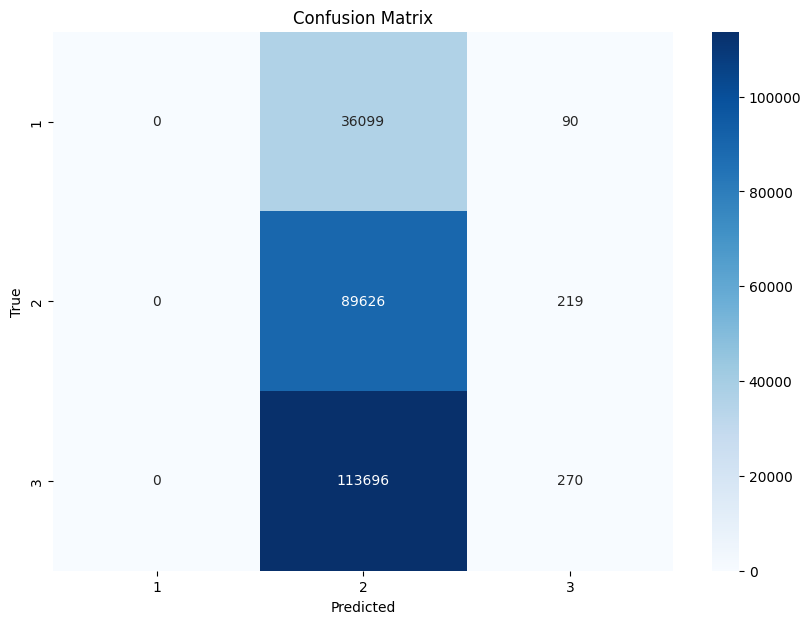

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, onnx_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


 Compare ONNX Model with Original Pipeline

In [25]:
# Evaluate the original pipeline accuracy
original_predictions = best_pipeline.predict(X_test)
print("Accuracy of original pipeline:", accuracy_score(y_test, original_predictions))

# Compare with ONNX model predictions
print("Accuracy of ONNX model:", accuracy_score(y_test, onnx_predictions))


Accuracy of original pipeline: 0.7240208333333333
Accuracy of ONNX model: 0.37456666666666666
